## Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Sin Signal

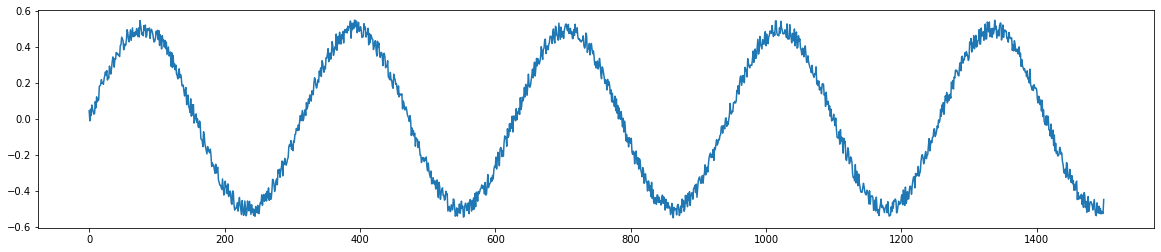

In [2]:
N = 1500
t = np.arange(0,N)
sin_data = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(sin_data)
plt.show()

## Square Signal

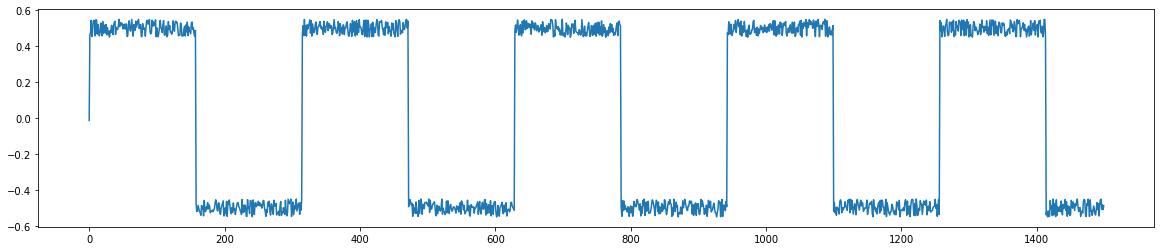

In [3]:
square_data = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(square_data)
plt.show()

## Triangle Signal

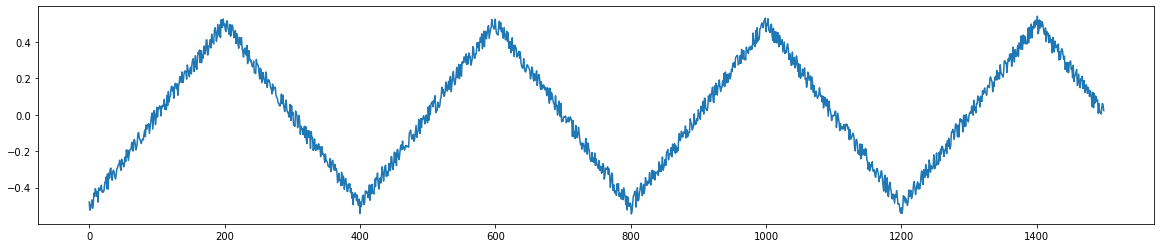

In [4]:
P = 200
A = 2 
triangle_data = ((A/P) * (P - np.abs(t % (2 * P) - P))-1) / 2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(triangle_data)
plt.show()

## Convert Signal To Dataset

In [5]:
def convertSignalToDataset(signal,step,label):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(label)
    
    return np.array(X), np.array(Y)

In [6]:
X_sin, Y_sin = convertSignalToDataset(sin_data,40,0)
X_square, Y_square = convertSignalToDataset(square_data,40,1)
X_triangle, Y_triangle = convertSignalToDataset(triangle_data,40,2) 

In [7]:
X = np.concatenate((X_sin,X_square,X_triangle),axis=0)
Y = np.concatenate((Y_sin,Y_square,Y_triangle),axis=0)
X = X[...,np.newaxis]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## Model
## RNN

In [9]:
model = Sequential()
model.add(SimpleRNN(units=64,input_shape=(X_train.shape[1:]))
model.add(Dense(128,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [10]:
model.compile(optimizer=Adam(),loss=sparse_categorical_crossentropy,metrics=["accuracy"])
checkpoint = ModelCheckpoint("RNN.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [11]:
history = model.fit(X_train,Y_train,
                   epochs=250,
                   batch_size = 32, 
                   validation_data=(X_test,Y_test),
                   callbacks=[checkpoint])

Epoch 1/250
110/110 [==============================] - 2s 8ms/step - loss: 0.8404 - accuracy: 0.5956 - val_loss: 0.6787 - val_accuracy: 0.7169
Epoch 2/250
110/110 [==============================] - 1s 7ms/step - loss: 0.7021 - accuracy: 0.6852 - val_loss: 0.6091 - val_accuracy: 0.7237
Epoch 3/250
110/110 [==============================] - 1s 7ms/step - loss: 0.6212 - accuracy: 0.7386 - val_loss: 0.4956 - val_accuracy: 0.8116
Epoch 4/250
110/110 [==============================] - 1s 7ms/step - loss: 0.5622 - accuracy: 0.7546 - val_loss: 0.5545 - val_accuracy: 0.7797
Epoch 5/250
110/110 [==============================] - 1s 6ms/step - loss: 0.4547 - accuracy: 0.7888 - val_loss: 0.5471 - val_accuracy: 0.7557
Epoch 6/250
110/110 [==============================] - 1s 6ms/step - loss: 0.4696 - accuracy: 0.8028 - val_loss: 0.6392 - val_accuracy: 0.6256
Epoch 7/250
110/110 [==============================] - 1s 5ms/step - loss: 0.4535 - accuracy: 0.7957 - val_loss: 0.3890 - val_accuracy: 0.8025

Epoch 58/250
110/110 [==============================] - 1s 7ms/step - loss: 0.2410 - accuracy: 0.8981 - val_loss: 0.1408 - val_accuracy: 0.9326
Epoch 59/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1504 - accuracy: 0.9355 - val_loss: 0.2060 - val_accuracy: 0.9201
Epoch 60/250
110/110 [==============================] - 1s 7ms/step - loss: 0.4487 - accuracy: 0.8216 - val_loss: 0.2178 - val_accuracy: 0.8973
Epoch 61/250
110/110 [==============================] - 1s 7ms/step - loss: 0.2250 - accuracy: 0.9015 - val_loss: 0.1823 - val_accuracy: 0.9338
Epoch 62/250
110/110 [==============================] - 1s 7ms/step - loss: 0.2073 - accuracy: 0.9084 - val_loss: 0.1352 - val_accuracy: 0.9566
Epoch 63/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1888 - accuracy: 0.9192 - val_loss: 0.1176 - val_accuracy: 0.9589
Epoch 64/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1253 - accuracy: 0.9458 - val_loss: 0.1085 - val_accuracy:

Epoch 115/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1528 - accuracy: 0.9346 - val_loss: 0.1097 - val_accuracy: 0.9532
Epoch 116/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1097 - accuracy: 0.9541 - val_loss: 0.1715 - val_accuracy: 0.9338
Epoch 117/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1253 - accuracy: 0.9489 - val_loss: 0.1240 - val_accuracy: 0.9429
Epoch 118/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1011 - accuracy: 0.9578 - val_loss: 0.1309 - val_accuracy: 0.9463
Epoch 119/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1028 - accuracy: 0.9575 - val_loss: 0.1326 - val_accuracy: 0.9452
Epoch 120/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1412 - accuracy: 0.9415 - val_loss: 0.1599 - val_accuracy: 0.9292
Epoch 121/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1192 - accuracy: 0.9483 - val_loss: 0.1351 - val_ac

110/110 [==============================] - 1s 6ms/step - loss: 0.2581 - accuracy: 0.8961 - val_loss: 0.1042 - val_accuracy: 0.9669
Epoch 172/250
110/110 [==============================] - 1s 7ms/step - loss: 0.0966 - accuracy: 0.9592 - val_loss: 0.0814 - val_accuracy: 0.9646
Epoch 173/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1067 - accuracy: 0.9541 - val_loss: 0.0924 - val_accuracy: 0.9612
Epoch 174/250
110/110 [==============================] - 1s 6ms/step - loss: 0.3408 - accuracy: 0.8602 - val_loss: 0.2105 - val_accuracy: 0.9110
Epoch 175/250
110/110 [==============================] - 1s 7ms/step - loss: 0.2612 - accuracy: 0.8861 - val_loss: 0.1644 - val_accuracy: 0.9452
Epoch 176/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1575 - accuracy: 0.9324 - val_loss: 0.1252 - val_accuracy: 0.9463
Epoch 177/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1370 - accuracy: 0.9369 - val_loss: 0.3129 - val_accuracy: 0.8584

110/110 [==============================] - 1s 7ms/step - loss: 0.1132 - accuracy: 0.9521 - val_loss: 0.1136 - val_accuracy: 0.9452
Epoch 228/250
110/110 [==============================] - 1s 7ms/step - loss: 0.0959 - accuracy: 0.9598 - val_loss: 0.1163 - val_accuracy: 0.9612
Epoch 229/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1176 - accuracy: 0.9509 - val_loss: 0.0745 - val_accuracy: 0.9646
Epoch 230/250
110/110 [==============================] - 1s 7ms/step - loss: 0.1465 - accuracy: 0.9412 - val_loss: 0.3579 - val_accuracy: 0.8858
Epoch 231/250
110/110 [==============================] - 1s 7ms/step - loss: 0.2270 - accuracy: 0.9095 - val_loss: 0.1026 - val_accuracy: 0.9623
Epoch 232/250
110/110 [==============================] - 1s 8ms/step - loss: 0.1086 - accuracy: 0.9563 - val_loss: 0.0841 - val_accuracy: 0.9703
Epoch 233/250
110/110 [==============================] - 1s 8ms/step - loss: 0.0977 - accuracy: 0.9580 - val_loss: 0.1154 - val_accuracy: 0.9555

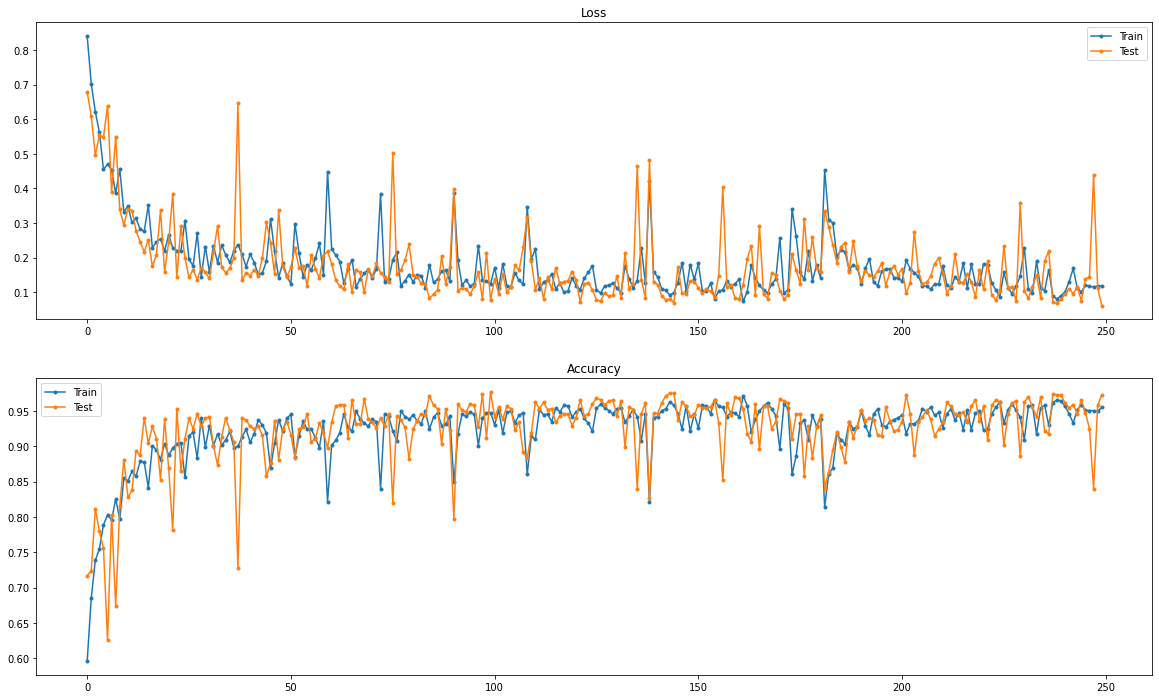

In [12]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(20,12))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

# Inference

## Sin Signal

In [13]:
N = 40
t = np.arange(0,N)
x = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

0


## Square Signal

In [14]:
N = 40
t = np.arange(0,N)
x = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

1


## Triangle Signal

In [15]:
N = 40
t = np.arange(0,N)
P = 200
A = 2 
x = ((A/P) * (P - np.abs(t % (2 * P) - P))-1) / 2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

2
